In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import *
import pyforest
import matplotlib.pyplot as plt
plt.style.use('default')
import cv2
from math import sqrt
from tqdm import tqdm


In [2]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        extract_patches=False,
        normalize=None,
        n_jobs=-1,
)


In [36]:
img_idx = 10

#### Functions

In [4]:
def plot_img_rois(index: int, colors = ['yellow','orange'], linewidth = 1,radius = 6):
    """
    Plots the original image with rois as markers. Rectangles for rois with bounding boxes
    and circles with given radius for point lesions. Both markers with given linewidth and colors.

    Args:
        index (int): index of item in the database instance INBreast_Dataset
        colors (list, optional): color of the marker [rectangles, circles]. Defaults to ['yellow','orange'].
        linewidth (int, optional): width of line. Defaults to 1.
        radius (int, optional): radius of circles. Defaults to 6.
    """
    f,ax = plt.subplots(1,2,figsize=(10,8))
    ax[0].imshow(db[index]['img'],cmap='gray') # display image
    
    lesion_bbxs = [[bbox[0],bbox[1][0]-bbox[0][0],bbox[1][1]-bbox[0][1]] \
         for bbox in db[index]['lesion_bboxes'] if bbox[0] != bbox[1]] # get lesion boxes

    lesion_pts = [bbox[0] for bbox in db[index]['lesion_bboxes'] if bbox[0] == bbox[1]] # get lesion points
    
    for coords,width,height in lesion_bbxs:
        rec = plt.Rectangle(coords, width=width, height=height, color=colors[0], linewidth=linewidth, fill=False)
        ax[0].add_patch(rec)
    for coords in lesion_pts:
        c = plt.Circle(coords, radius=radius, color=colors[1], linewidth=linewidth, fill=False)
        ax[0].add_patch(c)
    ax[0].set_title('Image with ROIs')
    ax[0].axis('off')
    ax[1].imshow(db[index]['lesion_mask'])
    ax[1].set_title('Image mask')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
def easy_plot(i: int):
    """Plots the original image and mask, of instance INBreast_Dataset

    Args:
        i (int): index of item
    """
    f,ax = plt.subplots(1,2,figsize=(8,6))
    ax[0].imshow(db[i]['img'], cmap='gray' )
    ax[1].imshow(db[i]['lesion_mask'])
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

In [6]:
def gaus_plot(i,img_gaus):
    f,ax = plt.subplots(1,2,figsize=(8,6))
    ax[0].imshow(db[i]['img'], cmap='gray' )
    ax[1].imshow(img_gaus,cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

In [7]:
import seaborn as sns

def plot_img_hist(img):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(img,cmap='gray')
    sns.histplot(img.flatten(), ax=ax[1], bins=1000, element='poly', alpha=0.2)
    ax[1].set_yscale("log")

In [8]:
def plot_blobs(image,image_blobs):
    f,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(image,cmap='gray')
    for blob in tqdm(image_blobs):
        y,x,r = blob
        c = plt.Circle((x, y), r, color='yellow', linewidth=1, fill=False)
        ax.add_patch(c)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
def norm_image(image):
    return (image-image.min())/(image.max()-image.min()) # image normalization

### Gaussian blurr

#### Checking DogG

In [74]:
image = norm_image(db[img_idx]['img'])
img_blurred_h_l = cv2.GaussianBlur(image,g_kernel_size,sigmaX=sigma_array[1]) - cv2.GaussianBlur(image,g_kernel_size,sigmaX=sigma_array[0])
img_blurred_l_h = cv2.GaussianBlur(image,g_kernel_size,sigmaX=sigma_array[0]) - cv2.GaussianBlur(image,g_kernel_size,sigmaX=sigma_array[1])

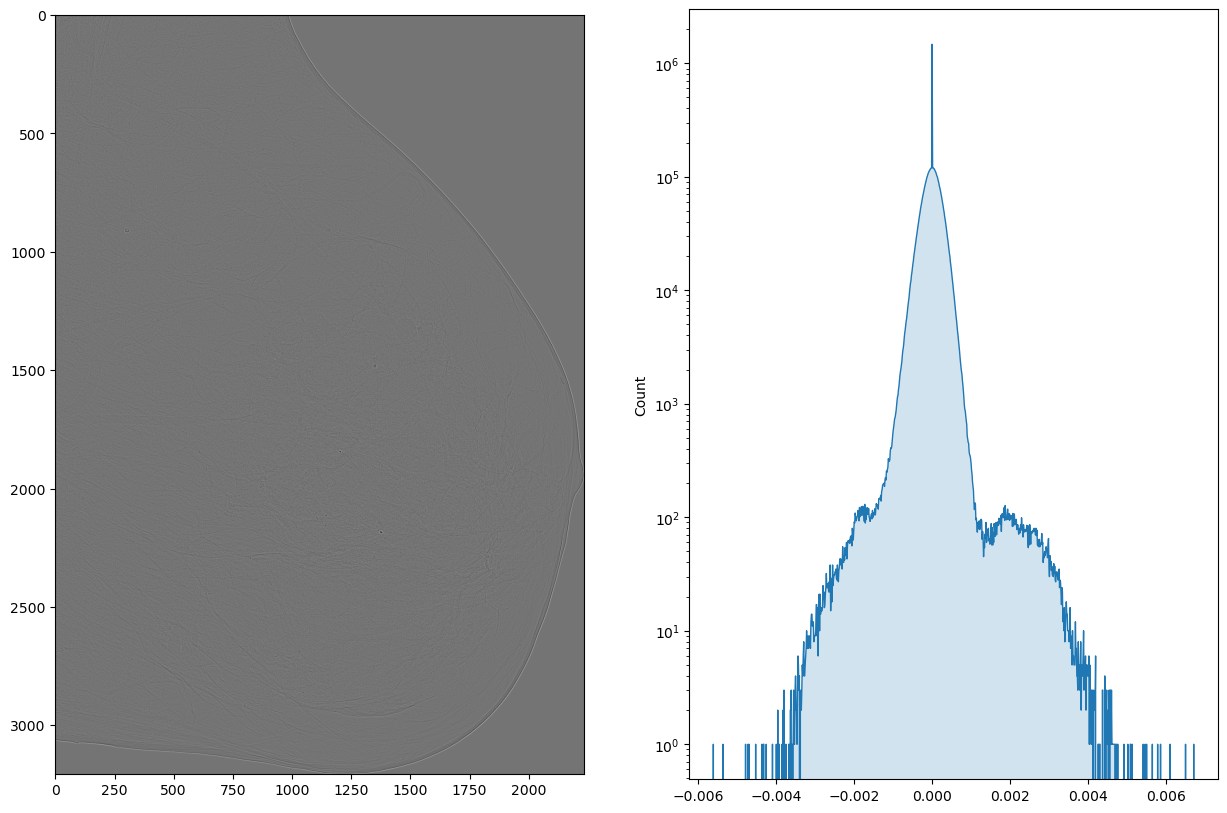

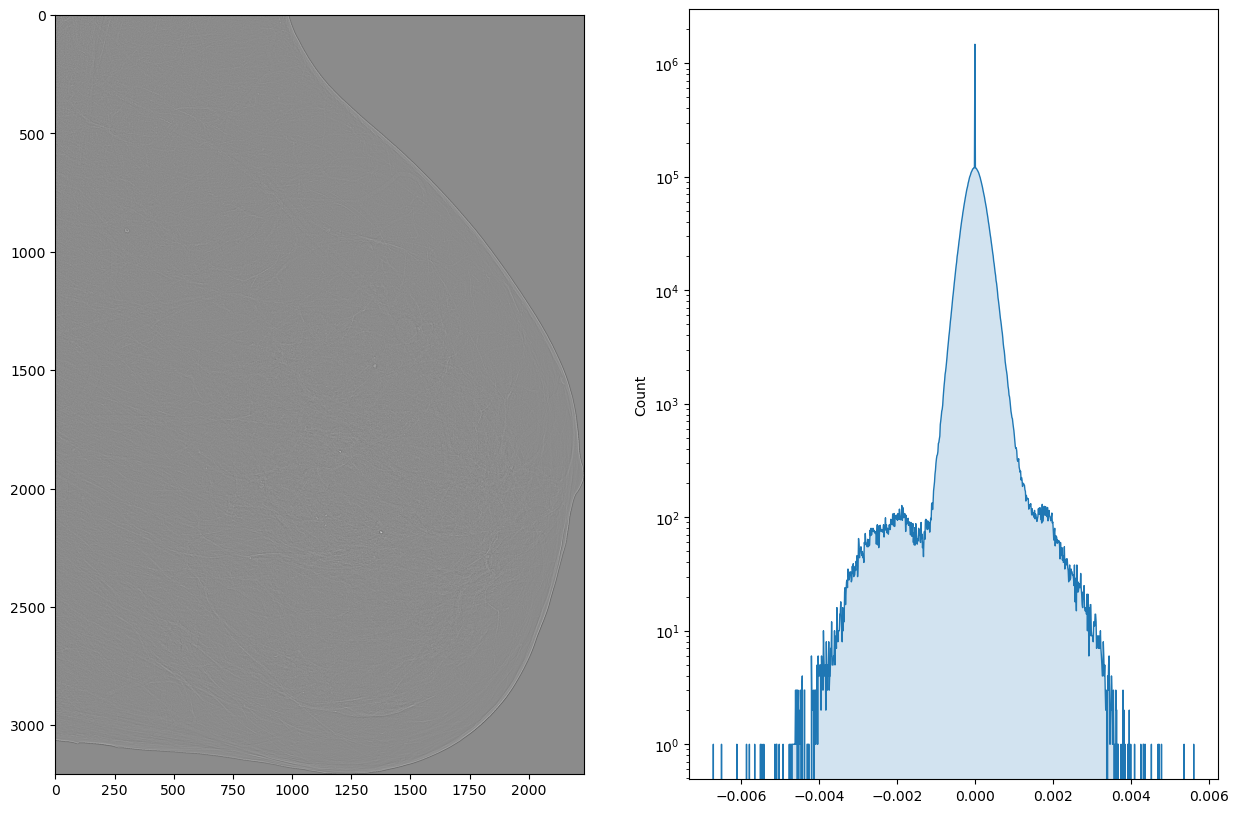

In [80]:
plot_img_hist(img_blurred_h_l)
plot_img_hist(img_blurred_l_h)

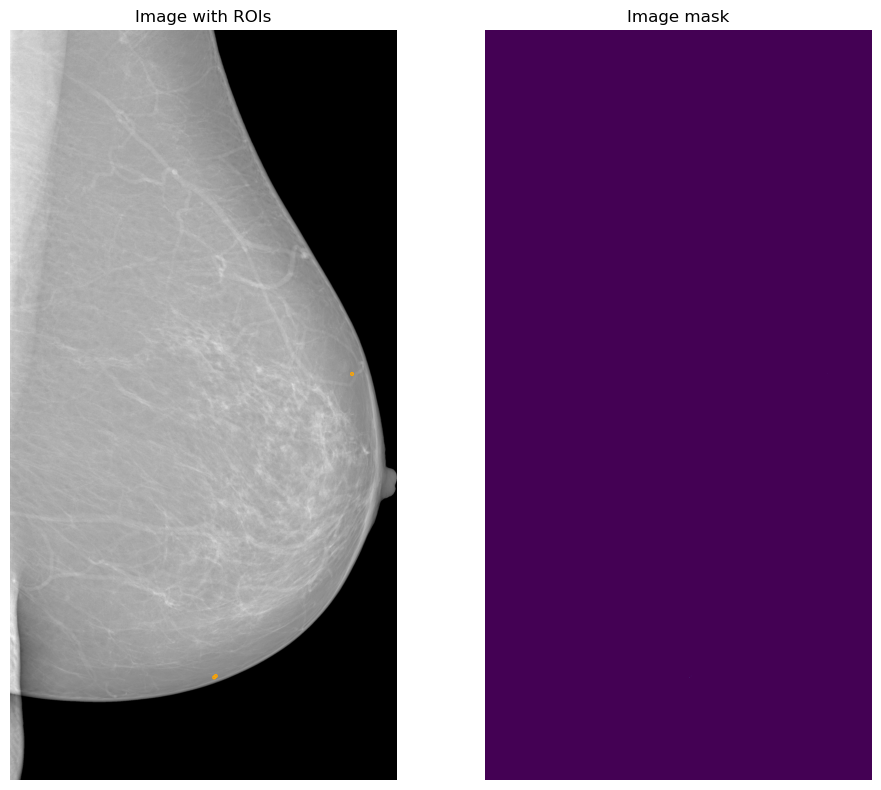

In [37]:
plot_img_rois(img_idx)

#### DoG

In [97]:
# CHECK THE ASCENDING OR DESCENDING ORDER OF SIGMA, IF K > 1 OR < 1

# #g_kernel_size = (25,25)
# k = 1.05
# n_scales = 20
# #sigma_array = np.linspace(1.18,3.1,21)
# sigma_array = np.array([1.18*(k**n) for n in range(n_scales+1)]) # np.flip
# print(f'Sigma array: {sigma_array}')


Sigma array: [1.18       1.239      1.30095    1.3659975  1.43429738 1.50601224
 1.58131286 1.6603785  1.74339742 1.83056729 1.92209566 2.01820044
 2.11911046 2.22506599 2.33631929 2.45313525 2.57579201 2.70458162
 2.8398107  2.98180123 3.13089129]


In [92]:
# image = norm_image(db[img_idx]['img'])
# img_dog = []

# for idx in range(sigma_array.shape[0]-2,-1,-1):
#     #print(idx)
#     norm = sigma_array[idx]/(sigma_array[idx]-sigma_array[idx+1])
#     #print(norm)
#     dog = norm*(cv2.GaussianBlur(image,ksize=(0,0),sigmaX=sigma_array[idx+1]) - cv2.GaussianBlur(image,ksize=(0,0),sigmaX=sigma_array[idx]))
#     img_dog.append(dog)
# img_dog = np.asarray(img_dog)
# print(f'Scale-space DoG shape: {img_dog.shape}')

21.000000000000018
20.999999999999943
21.000000000000025
20.999999999999964
20.99999999999994
20.999999999999957
21.000000000000007
20.999999999999993
21.000000000000007
20.999999999999986
20.99999999999999
20.999999999999993
20.999999999999936
20.99999999999996
21.000000000000014
21.000000000000025
20.999999999999915
21.00000000000007
20.999999999999893
21.000000000000018
Scale-space DoG shape: (20, 3205, 2232)


In [38]:
from scipy.ndimage import gaussian_filter

k = 1.05
n_scales = 20
sf = 1/(k-1)
min_sigma = 1.18

image = norm_image(db[img_idx]['img'])

sigma_array = np.array([min_sigma*(k**n) for n in range(n_scales+1)]) # np.flip
print(f'Sigma array: {sigma_array}')

gaussian_images = [gaussian_filter(image, s, mode='reflect') for s in sigma_array]

img_dog = [sf*(gaussian_images[i] - gaussian_images[i+1]) for i in range(n_scales)]
img_dog = np.asarray(img_dog)
print(f'Scale-space DoG shape: {img_dog.shape}')

Sigma array: [1.18       1.239      1.30095    1.3659975  1.43429738 1.50601224
 1.58131286 1.6603785  1.74339742 1.83056729 1.92209566 2.01820044
 2.11911046 2.22506599 2.33631929 2.45313525 2.57579201 2.70458162
 2.8398107  2.98180123 3.13089129]
Scale-space DoG shape: (20, 3328, 1714)


#### Histogram plots of DoGs

In [12]:
# np.unique(img_dog[0],return_counts=True)

(array([0.000000e+00, 2.100000e+01, 4.200000e+01, 6.300000e+01,
        8.400000e+01, 1.050000e+02, 1.260000e+02, 1.470000e+02,
        1.680000e+02, 1.890000e+02, 2.100000e+02, 2.310000e+02,
        1.375815e+06, 1.375836e+06, 1.375857e+06, 1.375878e+06,
        1.375899e+06, 1.375920e+06, 1.375941e+06, 1.375962e+06,
        1.375983e+06, 1.376004e+06, 1.376025e+06, 1.376046e+06,
        1.376067e+06, 1.376088e+06, 1.376109e+06, 1.376130e+06,
        1.376151e+06, 1.376172e+06, 1.376193e+06, 1.376214e+06,
        1.376235e+06]),
 array([2577583,  664802,   85430,    8741,    2428,    1388,     975,
            404,     149,      18,       6,       7,       1,       1,
              3,       7,      12,      16,      11,       7,      14,
             14,      43,     168,     515,    1005,    1381,    2141,
           2354,    1999,    4771,   69331,  681440]))

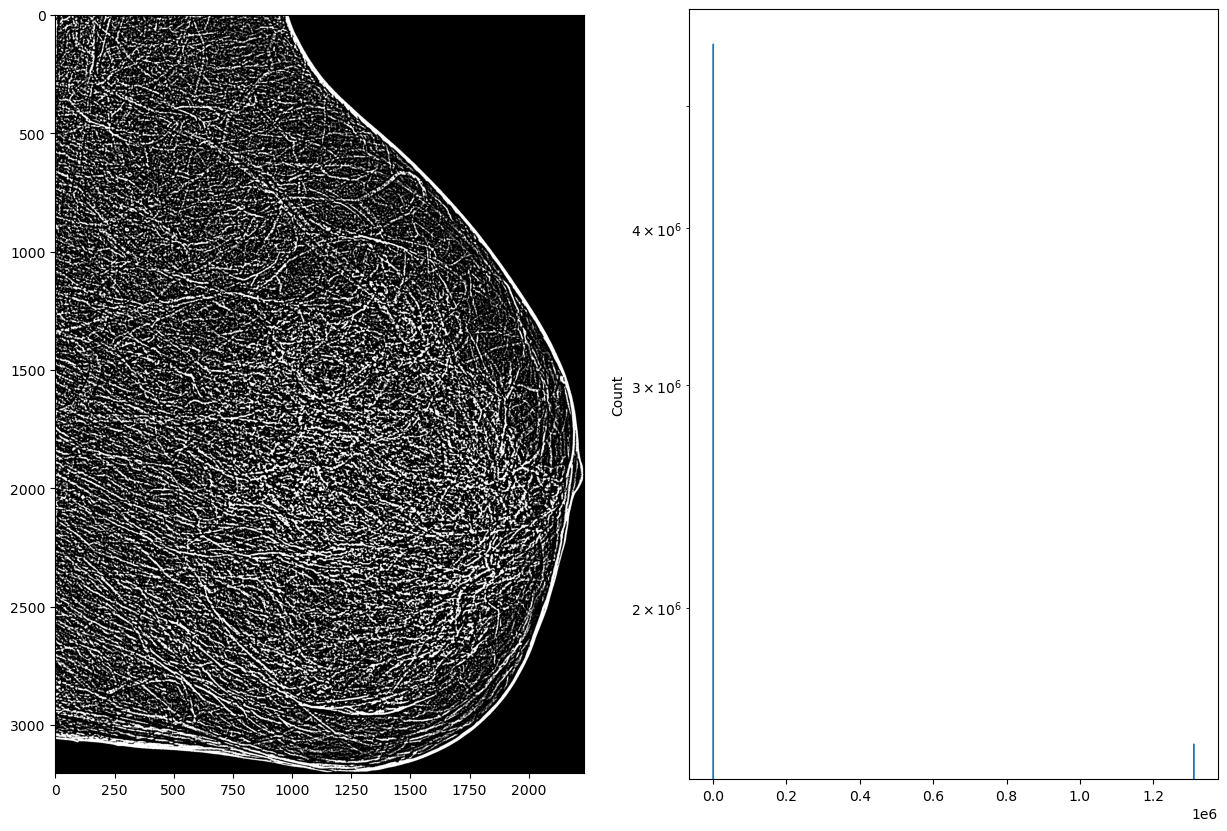

In [58]:
plot_img_hist(img_dog[0])

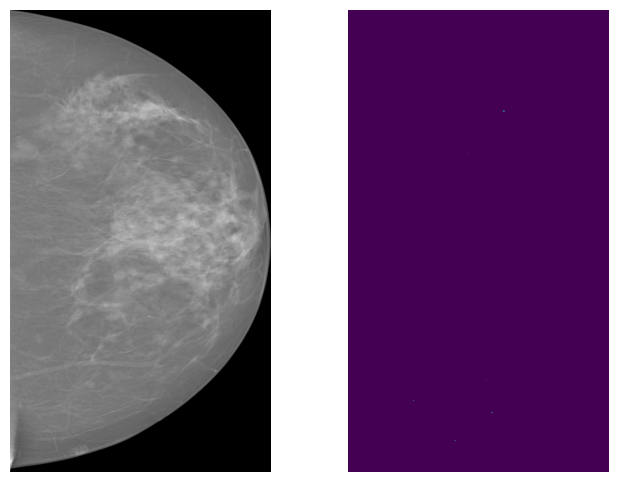

Number of calicifications in original image: 42


In [108]:
# easy_plot(0)
# print(f'Number of calicifications in original image: {db.df.iloc[0,1]}')

### Local Maxima

In [11]:
from scipy import ndimage, misc

In [104]:
np.array([0,1,2,3,4,5,6,7,8]).shape[0]//2

4

In [14]:
#filtering 
#img_dog_lm = ndimage.maximum_filter(img_dog,size=(3,3,3),mode='constant')

def compare_max(window: np.ndarray,t_dog = 0.006):
    element = window[window.shape[0]//2]
    return element if (element >= window.max()) and (element > t_dog) else 0


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 3., 2., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
#img_dog_lm = ndimage.generic_filter(img_dog,compare_max,size=(3,3,3),mode='constant')   

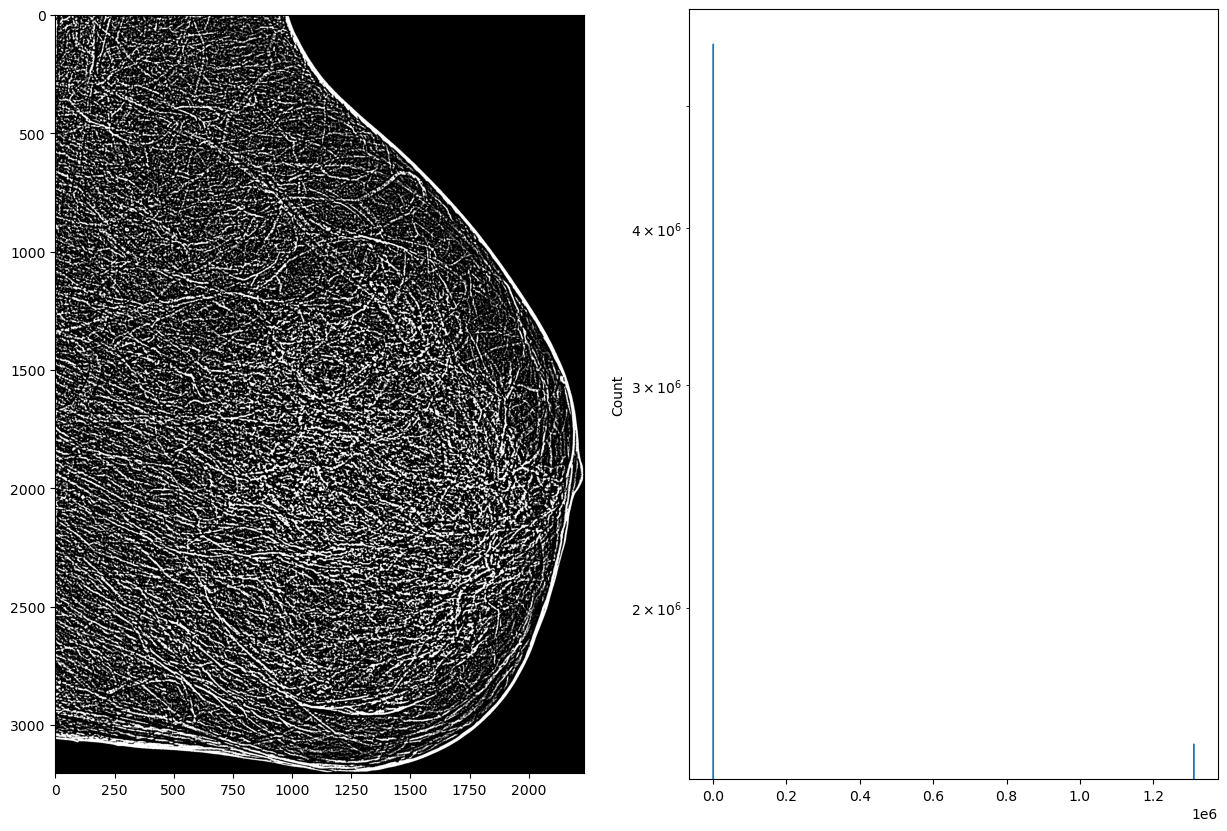

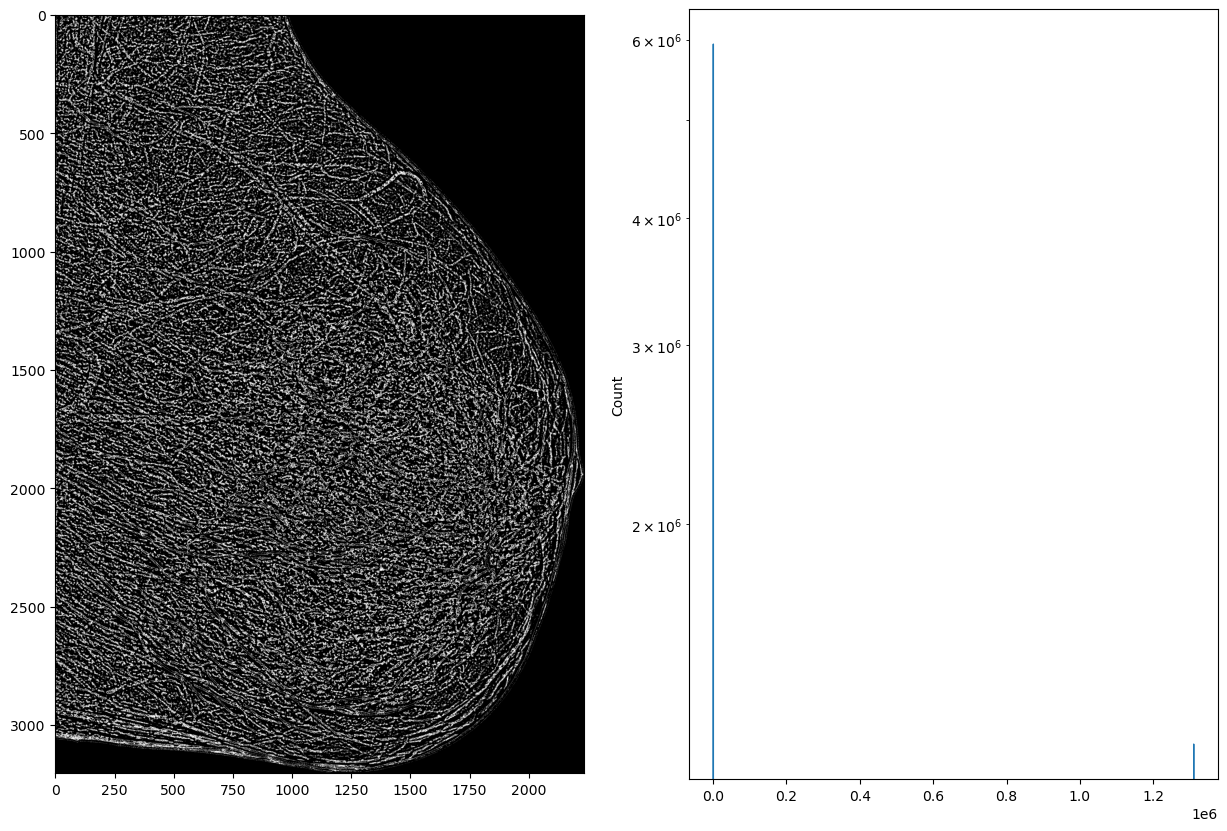

In [21]:
# plot_img_hist(img_dog[0])
# plot_img_hist(img_dog_lm[0])

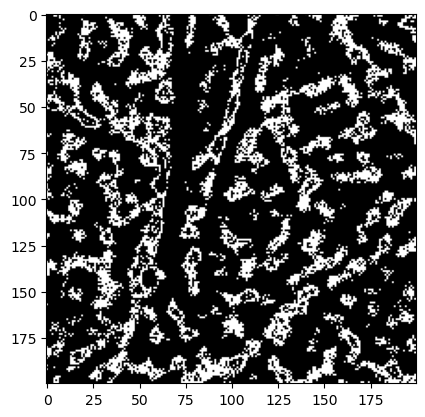

In [35]:
#plt.imshow(img_dog_lm[0][100:300,100:300],cmap='gray')

### Blob det (skimage)
for image 25 the nuumber of blobs is 92,886 with specified parameters
for image 2 the number of blobs 164,615 is time: 2 min 9.1 sec

In [12]:
from skimage.feature import blob_dog, hessian_matrix,hessian_matrix_det

In [39]:
# Get blob coordinates and corresponding sigmas
image = norm_image(db[img_idx]['img'])

min_sigma = 1.18
max_sigma = 3.1
sigma_ratio = 1.05 # must be the same as k
t_dog = 0.006
overlap_dog = 1

img_blobs = blob_dog(image,min_sigma=min_sigma,max_sigma=max_sigma,sigma_ratio=sigma_ratio,threshold=t_dog,overlap=overlap_dog)

# blobs coordinates are [r,c,sigma]
print(img_blobs.shape)
print(img_blobs)


(138851, 3)
[[1.96700000e+03 1.70700000e+03 2.83981070e+00]
 [2.00400000e+03 1.70700000e+03 2.57579201e+00]
 [2.04700000e+03 1.70100000e+03 2.57579201e+00]
 ...
 [9.85000000e+02 4.95000000e+02 1.18000000e+00]
 [2.80100000e+03 8.53000000e+02 1.18000000e+00]
 [4.73000000e+02 6.42000000e+02 1.18000000e+00]]


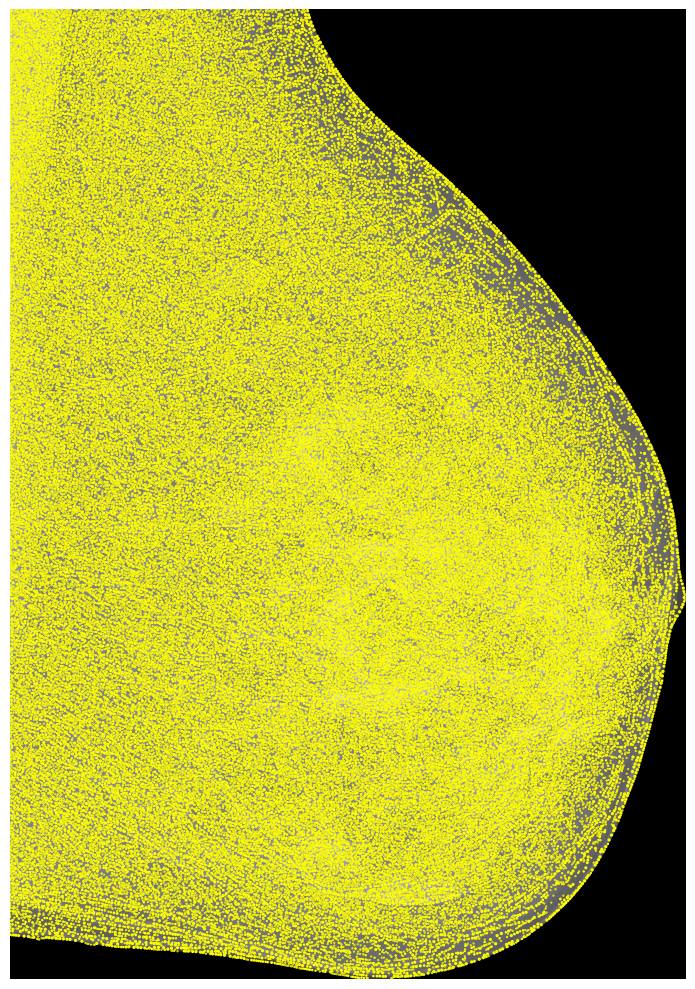

In [93]:
# PLOT BLOBS
# img_blobs_copy = img_blobs.copy()
# img_blobs_copy[:,2] = img_blobs[:,2] * sqrt(2)
# plot_blobs(image,img_blobs_copy[0:(img_blobs_copy.shape[0]//2)])

In [40]:
# hessian matrix of dog scale-space with condition mask
h_thr = 1.4
img_hdog_filter = []

# sigma_array_copy = np.flip(sigma_array.copy())
# sigma_array_copy = sigma_array_copy[:-1] # sigma_array_copy[1:]

print('Gettin hessian...')
for sigma_idx,dog in enumerate(tqdm(img_dog)):
    hrr,hrc,hcc = hessian_matrix(dog,sigma=sigma_array[sigma_idx],mode='constant') #
    trace = hrr + hcc
    det = (hrr*hcc) - hrc**2 #hessian_matrix_det(dog)
    hessian_mask = ((trace < 0) & ((det < 0) | (np.abs(det)/(trace**2) <= h_thr)))
    img_hdog_filter.append(hessian_mask)
    #break
img_hdog_filter = np.asarray(img_hdog_filter)
#print(f'{img_hdog_filter.shape}')

# Selection of  blobs
print('Filtering out blobs...')
blobs_filtered = []
blob_coords = img_blobs[:,:2].astype(int)

for blob_index,blob_sigma in enumerate(tqdm(img_blobs[:,2])):
    # print(blob)
    hess_mask = img_hdog_filter[np.where(sigma_array == blob_sigma)][0]
    if hess_mask[blob_coords[blob_index][0],blob_coords[blob_index][1]]:
        blobs_filtered.append([blob_coords[blob_index][0],blob_coords[blob_index][1],blob_sigma]) 

#blobs_filtered = np.asarray(blobs_filtered)   

print(f'Filtered blobs: {np.shape(blobs_filtered)}')

Gettin hessian...


  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_1344/3718999049.py:13: RuntimeWarning: divide by zero encountered in true_divide
  hessian_mask = ((trace < 0) & ((det < 0) | (np.abs(det)/(trace**2) <= h_thr)))
/tmp/ipykernel_1344/3718999049.py:13: RuntimeWarning: invalid value encountered in true_divide
  hessian_mask = ((trace < 0) & ((det < 0) | (np.abs(det)/(trace**2) <= h_thr)))
100%|██████████| 20/20 [00:07<00:00,  2.64it/s]


Filtering out blobs...


100%|██████████| 138851/138851 [01:24<00:00, 1645.67it/s]

Filtered blobs: (138773, 3)


In [41]:
# Create binary mask

img_binary_blobs = np.zeros(image.shape)

for blob in blobs_filtered:
    img_binary_blobs = cv2.circle(img_binary_blobs,(blob[1],blob[0]),int(blob[2]*sqrt(2)),255,-1)

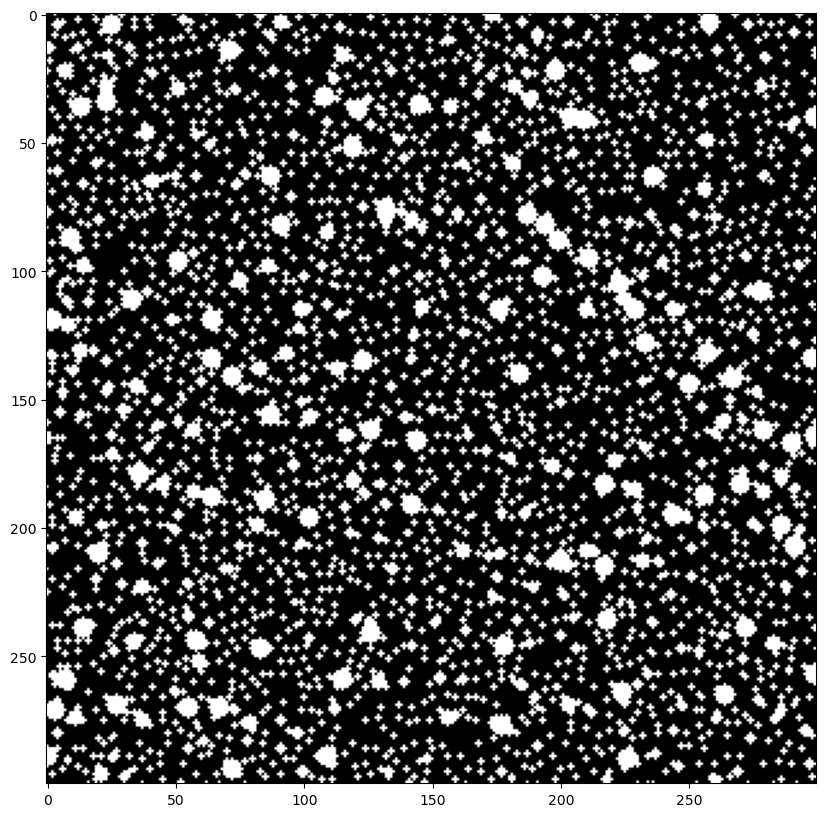

In [43]:
f,ax = plt.subplots(figsize=(10,10))
plt.imshow(img_binary_blobs[200:500,200:500],cmap='gray') # [200:500,200:500]

100%|██████████| 92016/92016 [00:28<00:00, 3255.17it/s]


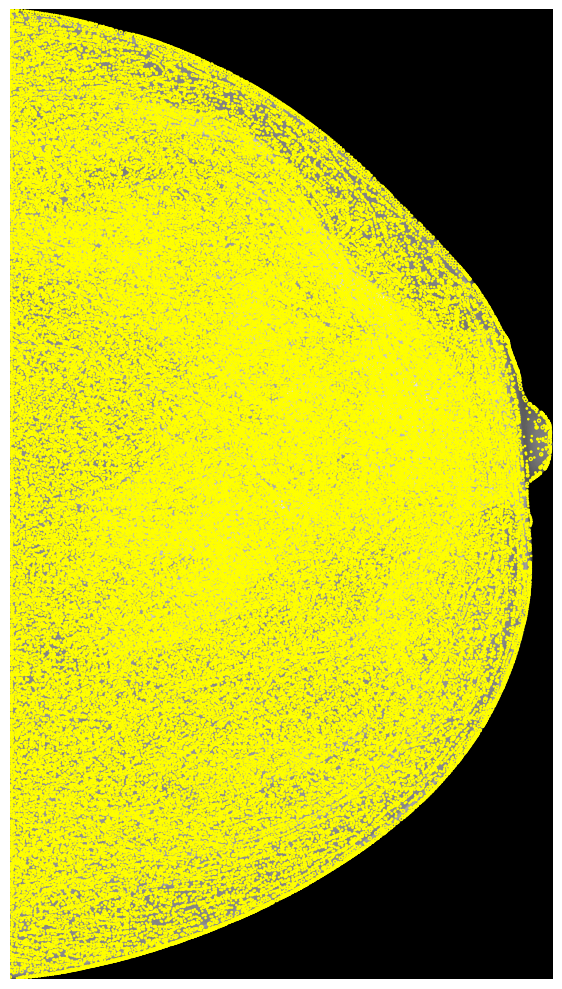

In [37]:
# blobs_filtered_copy = np.asarray(blobs_filtered.copy())
# blobs_filtered_copy[:,2] = blobs_filtered_copy[:,2] * sqrt(2)
# plot_blobs(image,blobs_filtered_copy)

#Testing DOH (det of hessians)

In [44]:

from skimage.feature import blob_doh

min_sigma = 1.18
max_sigma = 3.1
sigma_ratio = 1.05 # must be the same as k
t_dog = 0.006
overlap_dog = 1

blobs_doh = blob_doh(image,min_sigma=min_sigma,max_sigma=max_sigma,num_sigma=n_scales,threshold=t_dog,overlap=overlap_dog)
print(blobs_doh.shape)


img_doh_blobs = np.zeros(image.shape)
#blobs_doh_list = [[blob[0].astype(int),blob[1].astype(int),blob[2]] for blob in blob_doh]

for blob in (blobs_doh).astype(int):
    img_doh_blobs = cv2.circle(img_doh_blobs,(blob[1],blob[0]),int(blob[2]*sqrt(2)),255,-1)

(20664, 3)


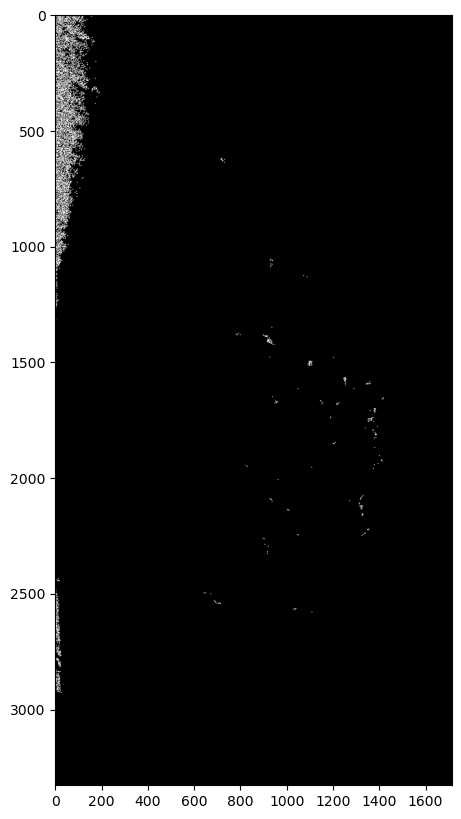

In [45]:
f,ax = plt.subplots(figsize=(10,10))
plt.imshow(img_doh_blobs,cmap='gray')

In [ ]:
list_img = [db[i]['img'] for i in range(10)]